## Analysing Goodreads ratings - Artificial Intelligence project
### EDA -Exploratory Data Analysis
Daniela Stern-Gabsi


#### Necessray imports and configuration file loading

In [1]:
#Import necessary packages
import pandas as pd
import os
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
#plt.style.use('ggplot')

In [2]:
#load configuration file
try:
    with open('configuration.yml', 'r') as file:
        conf = yaml.load(file, Loader=yaml.FullLoader)
except Exception as e:
    print('Error reading the config file')

In [3]:
conf

{'files': {'data_dir': 'data',
  'ratings_file': 'goodreads_rating_p.csv',
  'books_authors_file': 'goodreads_authors_np.csv',
  'books_works_file': 'goodreads_works.csv',
  'books_genres_file': 'goodreads_genres_p.csv',
  'books_file': 'goodreads_books_eng1.csv'}}

#### Loading the data

In [4]:
#Loading the data to pandas dataframes
#rating_file=os.path.join(conf["files"]["data_dir"],conf["files"]["ratings_file"])
#ratings=pd.read_csv(rating_file,na_values=['NA', ''])
#authors_file=os.path.join(conf["files"]["data_dir"],conf["files"]["books_authors_file"])
#authors=pd.read_csv(authors_file, na_values=['NA', ''])
#works_file=os.path.join(conf["files"]["data_dir"],conf["files"]["books_works_file"])
#works=pd.read_csv(works_file, na_values=['NA', ''])
#genres_file=os.path.join(conf["files"]["data_dir"],conf["files"]["books_genres_file"])
#genres=pd.read_csv(genres_file,na_values=['NA', ''])
books_file=os.path.join(conf["files"]["data_dir"],conf["files"]["books_file"])
books=pd.read_csv(books_file, na_values=['NA', ''])


#### Exploring books data

First we will explore the rating data which consists of the interactions between the if user and books:
Each user can rate a book in ascending order from zero to five .Zero rate means the users hasnt rated the book. User can also
add a review on the book .

In [5]:
books.head()

,Unnamed: 0,Unnamed: 0.1,book_id,work_id,title,num_pages,language_code,publication_year,format,author,...,fiction,poetry,children,"fantasy, paranormal","history, historical fiction, biography","comics, graphic",non-fiction,"mystery, thriller, crime",young-adult,romance
0,0,0,7327624,8948723.0,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",600.0,eng,1987.0,Hardcover,10333.0,...,8.0,1.0,NaN,31.0,NaN,NaN,NaN,1.0,NaN,NaN
1,1,1,6066819,6243154.0,Best Friends Forever,368.0,eng,2009.0,Hardcover,9212.0,...,555.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,23.0
2,2,2,89378,86259.0,Dog Heaven,40.0,eng,1995.0,Hardcover,5411.0,...,13.0,NaN,109.0,NaN,NaN,NaN,2.0,NaN,1.0,NaN
3,3,3,21401188,40699074.0,Glimmering Light,160.0,eng,2014.0,Paperback,4092328.0,...,7.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,1.0
4,5,5,16037549,5212748.0,Vision of Sir Launfal and Other Poems,80.0,eng,1887.0,Paperback,15585.0,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:

print(books.info())
print(books.describe())
print(books.isnull().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580986 entries, 0 to 580985
Data columns (total 30 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Unnamed: 0                              580986 non-null  int64  
 1   Unnamed: 0.1                            580986 non-null  int64  
 2   book_id                                 580986 non-null  int64  
 3   work_id                                 580986 non-null  float64
 4   title                                   580984 non-null  object 
 5   num_pages                               501527 non-null  float64
 6   language_code                           580986 non-null  object 
 7   publication_year                        558927 non-null  float64
 8   format                                  580986 non-null  object 
 9   author                                  580986 non-null  float64
 10  description                             5450

In [7]:
books.isnull().sum()

Unnamed: 0                                     0
Unnamed: 0.1                                   0
book_id                                        0
work_id                                        0
title                                          2
num_pages                                  79459
language_code                                  0
publication_year                           22059
format                                         0
author                                         0
description                                35945
is_ebook                                       0
series                                         0
image_url                                      0
read_count                                     0
text_reviews_count                             0
ratings_count                                  0
average_rating                                 0
author_id                                      0
name                                           0
fiction             

We can see that there are no null values.
Lets look at the rating distribution


In [ ]:
figure, axes = plt.subplots(figsize=(20,5))
#ratings["rating"].value_counts(normalize=True).plot(kind='bar',ax=axes[0])
#rating_counts=ratings["rating"].value_counts(normalize=True)
sns.histplot(books["average_rating"] ,bins=50, ax=axes)
axes.set_title("Rating distribution")
axes.set_ylabel("ratio")
axes.set_xlabel("rating")

In [ ]:
books.boxplot(column=["num_pages"] )
books[books["num_pages"]>10000].head(30)
#igure, axes = plt.subplots(figsize=(20,5))
#ratings["rating"].value_counts(normalize=True).plot(kind='bar',ax=axes[0])
#rating_counts=ratings["rating"].value_counts(normalize=True)
#sns.scatterplot(books["num_pages"]) #ax=axes)
#axes.set_title("Rating distribution")
#axes.set_ylabel("ratio")
#axes.set_xlabel("rating")

In [ ]:
books_new.boxplot(column=["publication_year"] )
books_new[books["publication_year"].isnull()].head(30)

books_new=books[books["publication_year"].isnull() | books["publication_year"].between(1500,2021)]

Text(0.5, 0, 'rating')

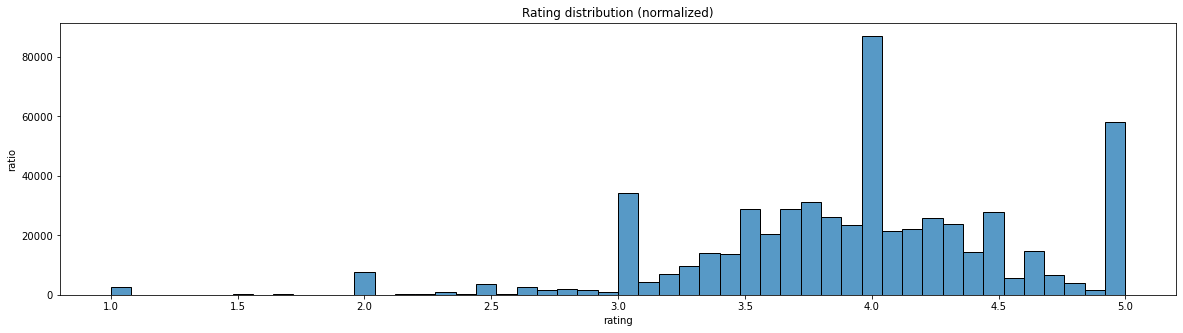

In [36]:
figure, axes = plt.subplots(figsize=(20,5))
#ratings["rating"].value_counts(normalize=True).plot(kind='bar',ax=axes[0])
#rating_counts=ratings["rating"].value_counts(normalize=True)
sns.histplot(books["average_rating"] ,bins=50, ax=axes)
axes.set_title("Rating distribution")
axes.set_ylabel("ratio")
axes.set_xlabel("rating")

,Unnamed: 0,book_id,work_id,title,num_pages,language_code,publication_year,format,author,description,...,poetry,children,"fantasy, paranormal","history, historical fiction, biography","comics, graphic",non-fiction,"mystery, thriller, crime",young-adult,romance,rating(floored)
4523,4523,18684543,762000.0,The New Oxford American Dictionary,945077.0,eng,2008.0,Kindle Edition,14392.0,"""Oxford's American editors drew on its 200-mil...",...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,4
37261,37261,20798120,40140311.0,"The Hong Kong Circle (Chinese Circles, #2)",81850.0,eng,2013.0,ebook,7846327.0,The Hong Kong Circle is the second novel in th...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
90291,90291,15781899,21497991.0,Siochain,69473.0,eng,2012.0,ebook,4864773.0,"Siochain means 'peace' in Gaelic, which is pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5
94163,94163,13477490,19008277.0,Valentine Delights Kiss Me,28000.0,eng,2012.0,ebook,5720348.0,The 14 Days of Valentines by Maggie Devine\nFo...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
166660,166660,1601986,1812074.0,Encyclopaedia Britannica,32000.0,eng,NaN,Hardcover,2999518.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4
172907,172907,12506941,16252910.0,The Legend of the Ice People (47 vols),12200.0,eng,2008.0,Paperback,755594.0,The Legend of the Ice People (in Norwegian lan...,...,NaN,NaN,6.0,5.0,NaN,NaN,1.0,NaN,4.0,4
174377,174377,78159,75488.0,The Story of Civilization (11 Volume Set),14777.0,eng,NaN,Paperback,16184.0,NaN,...,NaN,NaN,NaN,316.0,NaN,78.0,NaN,NaN,NaN,4
176223,176223,13540801,19103902.0,Spellbound Hearts,31698.0,eng,2012.0,ebook,5407198.0,Boxers or Briefs by Jillian Chantal\nMagical F...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
219549,219549,18193089,26527011.0,Rogue on the Rollaway,82000.0,eng,2013.0,ebook,3464183.0,Hell hath no fury like a faery scorned...\nA m...,...,NaN,NaN,5.0,2.0,NaN,NaN,NaN,NaN,4.0,4
239933,239933,16090740,21895125.0,How Work Gets Done: Business Process Managemen...,10540.0,eng,2010.0,Kindle Edition,5542178.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


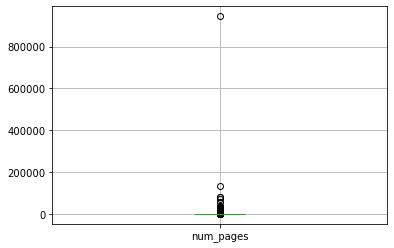

In [82]:
books.boxplot(column=["num_pages"] )
books[books["num_pages"]>10000].head(30)
#igure, axes = plt.subplots(figsize=(20,5))
#ratings["rating"].value_counts(normalize=True).plot(kind='bar',ax=axes[0])
#rating_counts=ratings["rating"].value_counts(normalize=True)
#sns.scatterplot(books["num_pages"]) #ax=axes)
#axes.set_title("Rating distribution")
#axes.set_ylabel("ratio")
#axes.set_xlabel("rating")

<ipython-input-103-7f4dd8a0b3e8>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  books_new[books["publication_year"].isnull()].head(30)


,Unnamed: 0,book_id,work_id,title,num_pages,language_code,publication_year,format,author,description,...,poetry,children,"fantasy, paranormal","history, historical fiction, biography","comics, graphic",non-fiction,"mystery, thriller, crime",young-adult,romance,rating(floored)
33,33,16103386,21914634.0,Skynappers,NaN,eng,NaN,Paperback,23113.0,Ace Double Novel D457,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4
45,45,12752275,17893172.0,40 Ways to Get Closer to God,NaN,en-US,NaN,Paperback,243000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1.0,NaN,4
46,46,828189,1774048.0,"Tarzan of the Apes (Tarzan, #1)",245.0,eng,NaN,Paperback,10885.0,In 1888 Lord and Lady Clayton sail from Englan...,...,NaN,31.0,507.0,64.0,NaN,NaN,11.0,36.0,45.0,4
96,96,17668616,24664784.0,Zombie Bay,NaN,eng,NaN,Kindle Edition,7012461.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,5
102,102,17794787,981423.0,Legs,317.0,eng,NaN,Paperback,26090.0,NaN,...,NaN,NaN,NaN,31.0,NaN,NaN,24.0,NaN,NaN,4
114,114,6719824,3077988.0,Treasure Island: A Story of the Spanish Main (...,NaN,eng,NaN,Hardcover,854076.0,A mysterious seaman hides at a country inn; cu...,...,NaN,2161.0,422.0,1052.0,NaN,NaN,48.0,792.0,NaN,3
132,132,12458829,13433455.0,"Switched (Trylle, #1)",333.0,eng,NaN,Paperback,3486415.0,Wendy Everly knew she was different the day he...,...,NaN,NaN,3024.0,NaN,NaN,NaN,NaN,1655.0,771.0,3
175,175,13643933,19138113.0,Overlay - A Tale of One Girl's Life in 1970s L...,318.0,eng,NaN,Kindle Edition,5784640.0,An alternate cover for this ASIN can be found ...,...,NaN,NaN,NaN,20.0,NaN,32.0,NaN,3.0,NaN,4
187,187,12388488,17369479.0,A Ripple in Time - Angel of the Titanic,216.0,eng,NaN,Kindle Edition,5137727.0,Wren's dream changed the course of history. To...,...,NaN,NaN,18.0,2.0,NaN,NaN,2.0,1.0,7.0,4
195,195,12409097,6978529.0,The Complete Science Fiction Treasury of H.G. ...,860.0,eng,NaN,Hardcover,880695.0,Preface by H.G. Wells / In the Days of the Com...,...,NaN,NaN,20.0,NaN,NaN,NaN,2.0,NaN,NaN,5


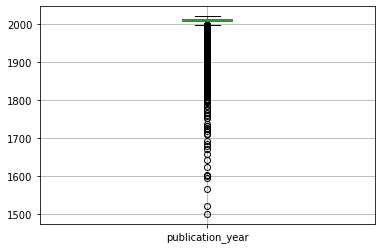

In [103]:
books_new.boxplot(column=["publication_year"] )
books_new[books["publication_year"].isnull()].head(30)

In [101]:
books_new=books[books["publication_year"].isnull() | books["publication_year"].between(1500,2021)]

In [102]:
books_new.isnull().sum()

Unnamed: 0                                     0
book_id                                        0
work_id                                        0
title                                          2
num_pages                                  79357
language_code                                  0
publication_year                           22059
format                                         0
author                                         0
description                                35917
is_ebook                                       0
series                                         0
image_url                                      0
read_count                                     0
text_reviews_count                             0
ratings_count                                  0
average_rating                                 0
author_id                                      0
name                                           0
fiction                                   221901
poetry              

Text(0.5, 1.0, 'Read count distribution by rating ')

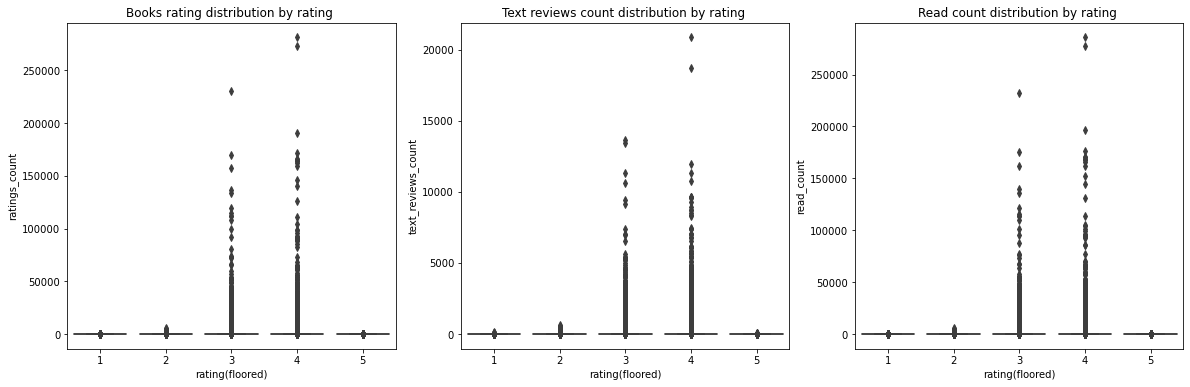

In [42]:
figure, axes = plt.subplots(1,3,figsize=(20,6))
books["rating(floored)"]=books["average_rating"].astype(int)
sns.boxplot(y="ratings_count", x="rating(floored)", data=books, ax=axes[0])
axes[0].set_title("Books rating distribution by rating ")
sns.boxplot(y="text_reviews_count", x="rating(floored)", data=books, ax=axes[1])
axes[1].set_title("Text reviews count distribution by rating ")
sns.boxplot(y="read_count", x="rating(floored)", data=books, ax=axes[2])
axes[2].set_title("Read count distribution by rating ")




<AxesSubplot:title={'center':'Ten books with the larget rating counts'}, ylabel='title'>

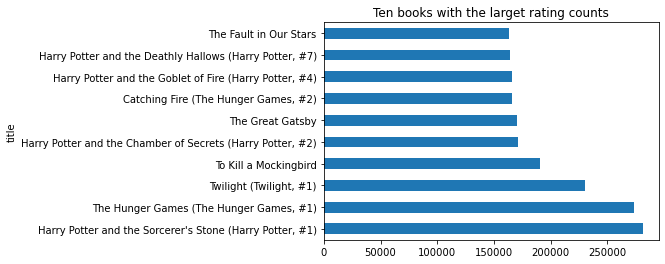

In [43]:
figure, axes = plt.subplots(figsize=(6,4))
axes.set_title("Ten books with the larget rating counts")
books.set_index("title")["ratings_count"].nlargest(10).plot(kind="barh", ax=axes)

#### Exploring authors data

In [70]:
authors=books[["author_id","name","ratings_count","average_rating"]]
authors_name=authors[["author_id","name"]].drop_duplicates()
authors["sum_rating"]=authors["average_rating"]*authors["ratings_count"]
authors=authors.groupby(["author_id"])["ratings_count","sum_rating"].sum()
authors["average_rating"]=authors["sum_rating"]/authors["ratings_count"]
authors=authors.merge(authors_name, how="left",left_on="author_id", right_on="author_id")

<ipython-input-70-0033d05d8f59>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  authors["sum_rating"]=authors["average_rating"]*authors["ratings_count"]
<ipython-input-70-0033d05d8f59>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  authors=authors.groupby(["author_id"])["ratings_count","sum_rating"].sum()


Text(0.5, 1.0, 'Authors rating distribution by rating ')

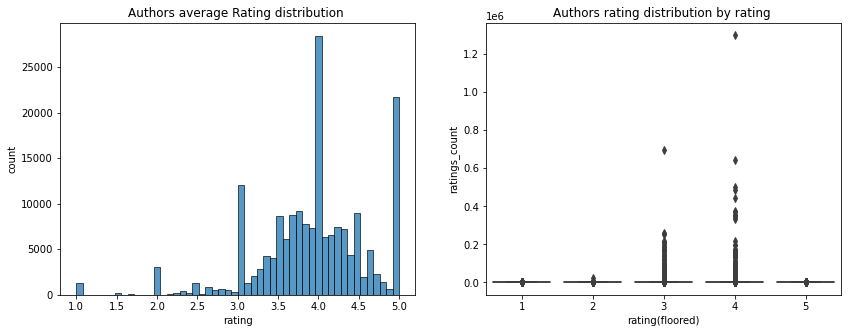

In [71]:
figure, axes = plt.subplots(1,2,figsize=(14,5))
sns.histplot(authors["average_rating"] ,bins=50, ax=axes[0])
axes[0].set_title("Authors average Rating distribution ")
axes[0].set_ylabel("count")
axes[0].set_xlabel("rating")
authors["rating(floored)"]=authors["average_rating"].astype(int)
sns.boxplot(y="ratings_count", x="rating(floored)", data=authors, ax=axes[1])
axes[1].set_title("Authors rating distribution by rating ")


<AxesSubplot:title={'center':'Ten authors with the larget rating counts'}, ylabel='name'>

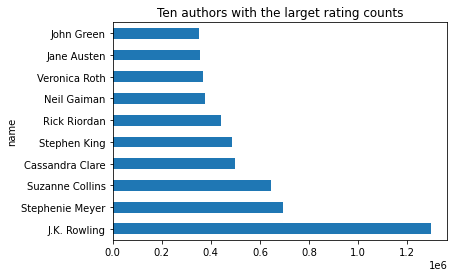

In [72]:
figure, axes = plt.subplots(figsize=(6,4))
axes.set_title("Ten authors with the larget rating counts")
authors.set_index("name")["ratings_count"].nlargest(10).plot(kind="barh", ax=axes)

#### Exploring geners data

<AxesSubplot:>

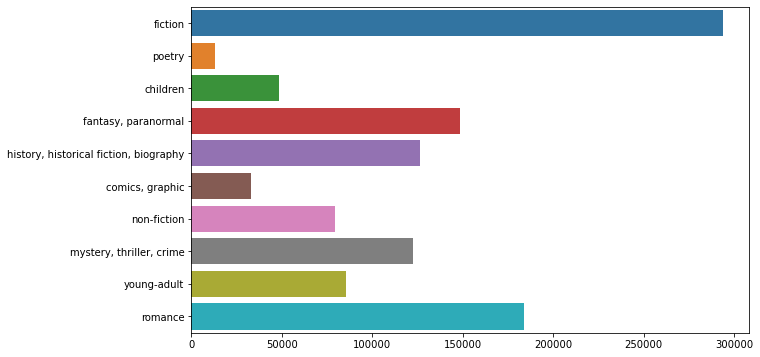

In [108]:
genres=books_new[["fiction","poetry","children","fantasy, paranormal","history, historical fiction, biography",
       "comics, graphic","non-fiction","mystery, thriller, crime","young-adult","romance"]]
figure, axes = plt.subplots(figsize=(10,6))     
bigger_1=(lambda x: 1 if x>1 else 0)
genres_dist=genres.applymap(bigger_1).sum().T
sns.barplot(y=genres_dist.index, x=genres_dist ,ax=axes)